<a href="https://colab.research.google.com/github/ziishanahmad/ai-object-identifying-model/blob/main/ai_object_identifying_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 106s 66ms/step - loss: 1.4963 - accuracy: 0.4521 - val_loss: 1.1536 - val_accuracy: 0.5958
Epoch 2/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.1134 - accuracy: 0.6076 - val_loss: 1.0019 - val_accuracy: 0.6463
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9593 - accuracy: 0.6657 - val_loss: 0.9089 - val_accuracy: 0.6811
Epoch 4/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.8548 - accuracy: 0.7016 - val_loss: 0.8940 - val_accuracy: 0.6895
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.7701 - accuracy: 0.7319 - val_loss: 0.8195 - val_accuracy: 0.7222
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7068 - accuracy: 0.7533 - val_loss: 0.8184 - val_accuracy: 0.7164
Epoch 7/10
1563/1563 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 15ms/step


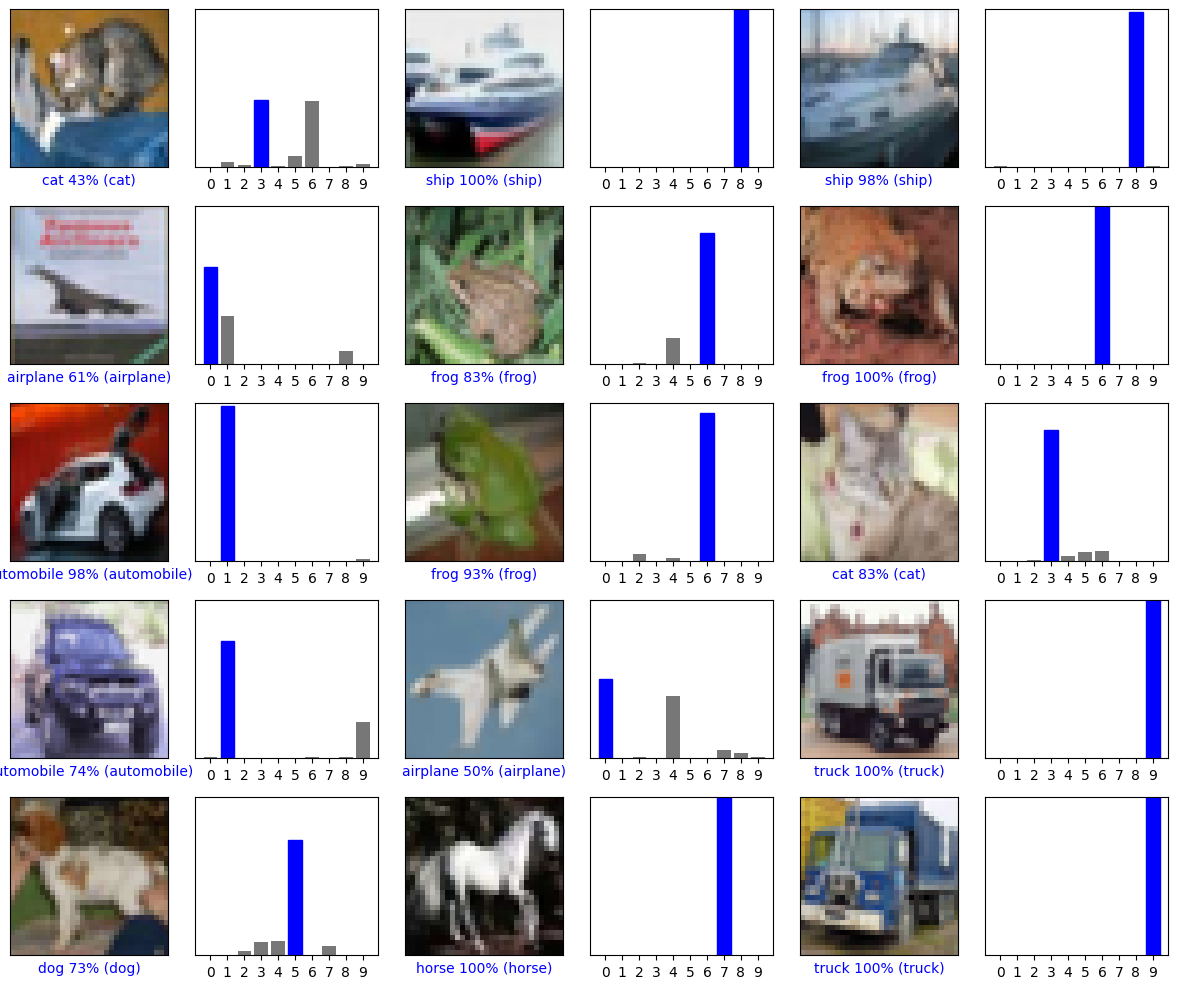

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Download and Prepare the CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 2: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 4: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Step 5: Save the Model
model.save('cifar10_model.h5')

# Step 6: Test the Model with Some Images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label[0]]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

# Predict the labels of the test images
predictions = model.predict(test_images)

# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Saving horse to horse
1/1 [==============================] - 0s 159ms/step


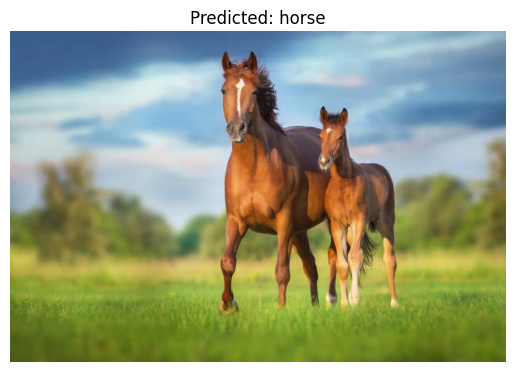

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Load the model
model = load_model('cifar10_model.h5')

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to preprocess the uploaded image
def preprocess_upload_image(image):
    img = image.resize((32, 32))  # Resize to the input size of the model
    img = np.array(img) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Upload an image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Load and preprocess the image
    image = Image.open(file_name)
    img = preprocess_upload_image(image)

    # Predict the label of the uploaded image
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction[0])

    # Display the image with the predicted label
    plt.imshow(image)
    plt.title(f'Predicted: {class_names[predicted_label]}')
    plt.axis('off')
    plt.show()
